In [1]:

#!/usr/bin/env python

import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from scipy.io import netcdf
from scipy.optimize import root_scalar



In [7]:
wout_file = "wout_nfp4_QH_cold_high_res_phase_one_mirror_1.35_aspect_7.0_iota_-1.043_000_000000.nc"
# wout_file = "wout_nfp4_QH_cold_high_res_phase_one_mirror_1.35_aspect_7.0_iota_0.28_000_000000.nc"
# wout_file = "wout_nfp4_QH_cold_high_res_phase_one_mirror_1.35_aspect_7.0_iota_0.42_000_000000.nc"
# wout_file = "wout_nfp4_QH_cold_high_res_phase_one_mirror_1.35_aspect_7.0_iota_0.53_000_000000.nc"
# wout_file = "wout_nfp4_QH_cold_high_res_phase_one_mirror_1.35_aspect_7.0_iota_0.71_000_000000.nc"
# wout_file = "wout_nfp4_QH_cold_high_res_phase_one_mirror_1.35_aspect_7.0_iota_0.89_000_000000.nc"
# wout_file = "wout_nfp4_QH_cold_high_res_phase_one_mirror_1.35_aspect_7.0_iota_0.97_000_000000.nc"
# wout_file = "wout_nfp4_QH_cold_high_res_phase_one_mirror_1.35_aspect_7.0_iota_1.05_000_000000.nc"
# wout_file = "wout_nfp4_QH_cold_high_res_phase_one_mirror_1.35_aspect_7.0_iota_1.29_000_000000.nc"
# wout_file = "wout_nfp4_QH_cold_high_res_phase_one_mirror_1.35_aspect_7.0_iota_1.44_000_000000.nc"

In [8]:

f = netcdf.netcdf_file(wout_file,'r',mmap=False)
phi = f.variables['phi'][()]
iotaf = f.variables['iotaf'][()]
presf = f.variables['presf'][()]
iotas = f.variables['iotas'][()]
pres = f.variables['pres'][()]
ns = f.variables['ns'][()]
nfp = f.variables['nfp'][()]
xn = f.variables['xn'][()]
xm = f.variables['xm'][()]
xn_nyq = f.variables['xn_nyq'][()]
xm_nyq = f.variables['xm_nyq'][()]
rmnc = f.variables['rmnc'][()]
zmns = f.variables['zmns'][()]
lmns = f.variables['lmns'][()]
bmnc = f.variables['bmnc'][()]
raxis_cc = f.variables['raxis_cc'][()]
zaxis_cs = f.variables['zaxis_cs'][()]
buco = f.variables['buco'][()]
bvco = f.variables['bvco'][()]
jcuru = f.variables['jcuru'][()]
jcurv = f.variables['jcurv'][()]
lasym = f.variables['lasym__logical__'][()]
if lasym==1:
    rmns = f.variables['rmns'][()]
    zmnc = f.variables['zmnc'][()]
    lmnc = f.variables['lmnc'][()]
    bmns = f.variables['bmns'][()]
    raxis_cs = f.variables['raxis_cs'][()]
    zaxis_cc = f.variables['zaxis_cc'][()]
else:
    rmns = 0*rmnc
    zmnc = 0*rmnc
    lmnc = 0*rmnc
    bmns = 0*bmnc
    raxis_cs = 0*raxis_cc
    zaxis_cc = 0*raxis_cc

    
print("nfp: ",nfp)
print("ns: ",ns)

mpol = f.variables['mpol'][()]
print("mpol: ",mpol)

ntor = f.variables['ntor'][()]
print("ntor: ",ntor)

Aminor_p = f.variables['Aminor_p'][()]
print("Aminor_p: ",Aminor_p)

Rmajor_p = f.variables['Rmajor_p'][()]
print("Rmajor_p: ",Rmajor_p)

data = f.variables['aspect'][()]
print("aspect:            ",data)

data = f.variables['betatotal'][()]
print("betatotal: ",data)

data = f.variables['betapol'][()]
print("betapol:   ",data)

data = f.variables['betator'][()]
print("betator:   ",data)

data = f.variables['betaxis'][()]
print("betaxis:   ",data)

ctor = f.variables['ctor'][()]
print("ctor:   ",ctor)

f.close()

nfp:  4
ns:  50
mpol:  7
ntor:  7
Aminor_p:  1.7478852513933092
Rmajor_p:  11.857515409300216
aspect:             6.783920969553417
betatotal:  0.0
betapol:    0.0
betator:    0.0
betaxis:    0.0
ctor:    8.612902058224847e-09


bmnc.shape: (50, 200)


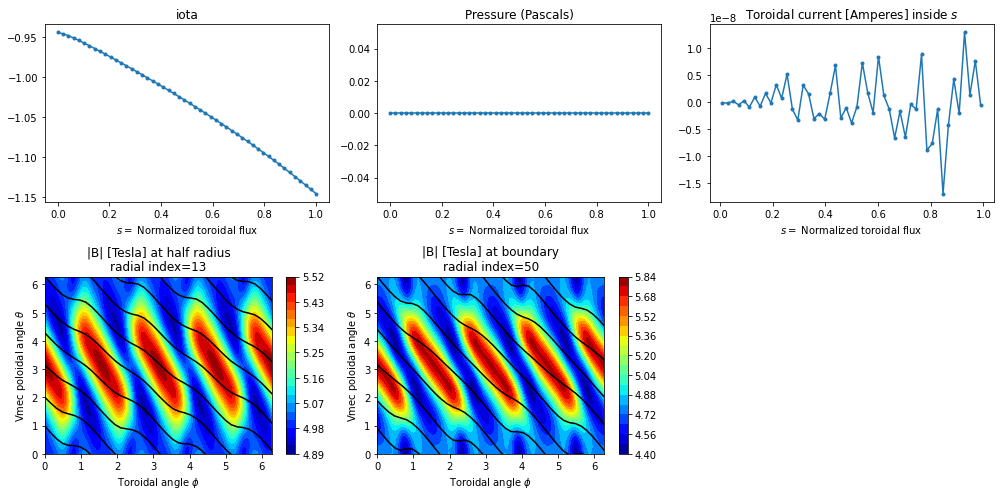

In [9]:
myfigsize=(14,7)


nmodes = len(xn)

s = np.linspace(0,1,ns)
s_half = [(i-0.5)/(ns-1) for i in range(1,ns)]

phiedge = phi[-1]
phi_half = [(i-0.5)*phiedge/(ns-1) for i in range(1,ns)]

ntheta = 200
nphi = 4
theta = np.linspace(0,2*np.pi,num=ntheta)
phi = np.linspace(0,2*np.pi/nfp,num=nphi,endpoint=False)
iradius = ns-1
R = np.zeros((ntheta,nphi))
Z = np.zeros((ntheta,nphi))
for itheta in range(ntheta):
    for iphi in range(nphi):
        for imode in range(nmodes):
            angle = xm[imode]*theta[itheta] - xn[imode]*phi[iphi]
            R[itheta,iphi] = R[itheta,iphi] + rmnc[iradius,imode]*np.cos(angle) + rmns[iradius,imode]*np.sin(angle)
            Z[itheta,iphi] = Z[itheta,iphi] + zmns[iradius,imode]*np.sin(angle) + zmnc[iradius,imode]*np.cos(angle)

Raxis = np.zeros(nphi)
Zaxis = np.zeros(nphi)
for iphi in range(nphi):
    for n in range(ntor+1):
        angle = -n*nfp*phi[iphi]
        Raxis[iphi] += raxis_cc[n]*np.cos(angle) + raxis_cs[n]*np.sin(angle)
        Zaxis[iphi] += zaxis_cs[n]*np.sin(angle) + zaxis_cc[n]*np.cos(angle)

xLabel = r'$s =$ Normalized toroidal flux'


fig = plt.figure(figsize=myfigsize)

numCols = 3
numRows = 2
plotNum = 1

plt.subplot(numRows,numCols,plotNum)
plotNum += 1
plt.plot(s, iotaf, '.-',label='iotaf')
plt.xlabel(xLabel)
plt.title('iota')

plt.subplot(numRows,numCols,plotNum)
plotNum += 1
plt.plot(s, presf, '.-',label='presf')
plt.xlabel(xLabel)
plt.title('Pressure (Pascals)')

mu0 = 4*np.pi*1.0e-7
toroidal_current_inside = 2*np.pi*buco/mu0
plt.subplot(numRows,numCols,plotNum)
plotNum += 1
plt.plot(s_half, toroidal_current_inside[1:], '.-',label='buco')
plt.title('Toroidal current [Amperes] inside $s$')
plt.xlabel(xLabel)


titles = ['|B| [Tesla] at half radius','|B| [Tesla] at boundary']
iradii = [int((ns*0.25).round()), ns-1]
print("bmnc.shape:",bmnc.shape)

def residual(theta_v, phi, theta_p_target, iradius):
    """
    This function is used for computing the value of theta_vmec that
    gives a desired theta_pest.
    """
    theta_p = theta_v
    for jmn in range(len(xn)):
        angle = xm[jmn] * theta_v - xn[jmn] * phi
        theta_p += lmns[iradius, jmn] * np.sin(angle) \
            + lmnc[iradius, jmn] * np.cos(angle)
    return theta_p_target - theta_p

for i in range(2):
    iradius = iradii[i]
    Ntheta = 80
    Nphi = 90
    theta = np.linspace(0,2*np.pi,num=Ntheta)
    phi = np.linspace(0,2*np.pi,num=Nphi)
    b = np.zeros([Ntheta,Nphi])
    phi2D,theta2D = np.meshgrid(phi,theta)
    iota = iotaf[iradius]
    for imode in range(len(xn_nyq)):
        angle = xm_nyq[imode]*theta2D - xn_nyq[imode]*phi2D
        b += bmnc[iradius,imode]*np.cos(angle) + bmns[iradius,imode]*np.sin(angle)

    plt.subplot(numRows,numCols,plotNum)
    plotNum += 1
    plt.set_cmap('jet')
    plt.contourf(phi2D,theta2D,b,20)
    plt.title(titles[i]+'\nradial index='+str(iradius+1))
    plt.xlabel(r'Toroidal angle $\phi$')
    plt.ylabel(r'Vmec poloidal angle $\theta$')
    plt.colorbar()
    plt.xlim([0,2*np.pi])
    plt.ylim([0,2*np.pi])

    # Now compute field lines
    Ntheta = 6
    Nphi = 40
    theta0_1d = np.linspace(0, 2 * np.pi, Ntheta, endpoint=False)
    phi_1d = np.linspace(0, 2 * np.pi, Nphi)
    theta_vmec = np.zeros([Ntheta, Nphi])
    phi, theta0 = np.meshgrid(phi_1d, theta0_1d)
    theta_pest = phi * iota + theta0
    for jphi in range(Nphi):
        for jtheta in range(Ntheta):
            theta_guess = theta_pest[jtheta, jphi]
            sol = root_scalar(residual,
                              args=(phi_1d[jphi], theta_pest[jtheta, jphi], iradius),
                              bracket=(theta_guess - 1.0, theta_guess + 1.0))
            theta_vmec[jtheta, jphi] = sol.root

    for jshift in range(-1, 2):
        plt.plot(phi.T, theta_vmec.T + 2 * np.pi * jshift, 'k')
            
plt.tight_layout()




bmnc.shape: (50, 200)


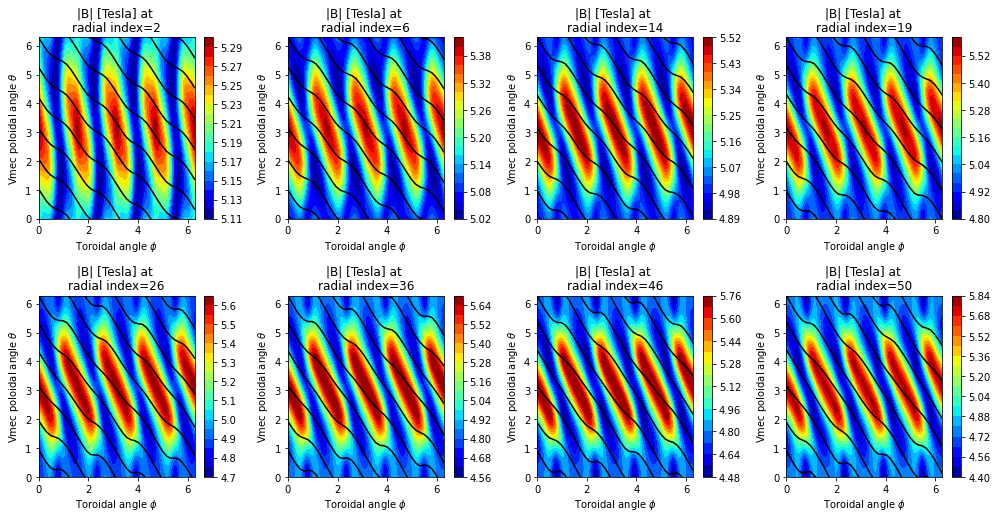

In [12]:
########################################################
# Now plot a whole bunch of contours of |B|
########################################################

iradii = [1,5,13,18,25,35,45,49]
n_surfaces = len(iradii)


fig = plt.figure(figsize=(14,14))

numCols = int(n_surfaces/2)
numRows = n_surfaces-numCols
plotNum = 1



print("bmnc.shape:",bmnc.shape)

for i in range(n_surfaces):
    iradius = iradii[i]
    Ntheta = 80
    Nphi = 90
    theta = np.linspace(0,2*np.pi,num=Ntheta)
    phi = np.linspace(0,2*np.pi,num=Nphi)
    b = np.zeros([Ntheta,Nphi])
    phi2D,theta2D = np.meshgrid(phi,theta)
    iota = iotaf[iradius]
    for imode in range(len(xn_nyq)):
        angle = xm_nyq[imode]*theta2D - xn_nyq[imode]*phi2D
        b += bmnc[iradius,imode]*np.cos(angle) + bmns[iradius,imode]*np.sin(angle)

    plt.subplot(numRows,numCols,plotNum)
    plotNum += 1
    plt.set_cmap('jet')
    plt.contourf(phi2D,theta2D,b,20)
    plt.title('|B| [Tesla] at '+'\nradial index='+str(iradius+1))
    plt.xlabel(r'Toroidal angle $\phi$')
    plt.ylabel(r'Vmec poloidal angle $\theta$')
    plt.colorbar()
    plt.xlim([0,2*np.pi])
    plt.ylim([0,2*np.pi])

    # Now compute field lines
    Ntheta = 6
    Nphi = 40
    theta0_1d = np.linspace(0, 2 * np.pi, Ntheta, endpoint=False)
    phi_1d = np.linspace(0, 2 * np.pi, Nphi)
    theta_vmec = np.zeros([Ntheta, Nphi])
    phi, theta0 = np.meshgrid(phi_1d, theta0_1d)
    theta_pest = phi * iota + theta0
    for jphi in range(Nphi):
        for jtheta in range(Ntheta):
            theta_guess = theta_pest[jtheta, jphi]
            sol = root_scalar(residual,
                              args=(phi_1d[jphi], theta_pest[jtheta, jphi], iradius),
                              bracket=(theta_guess - 1.0, theta_guess + 1.0))
            theta_vmec[jtheta, jphi] = sol.root

    for jshift in range(-1, 2):
        plt.plot(phi.T, theta_vmec.T + 2 * np.pi * jshift, 'k')
            
plt.tight_layout()




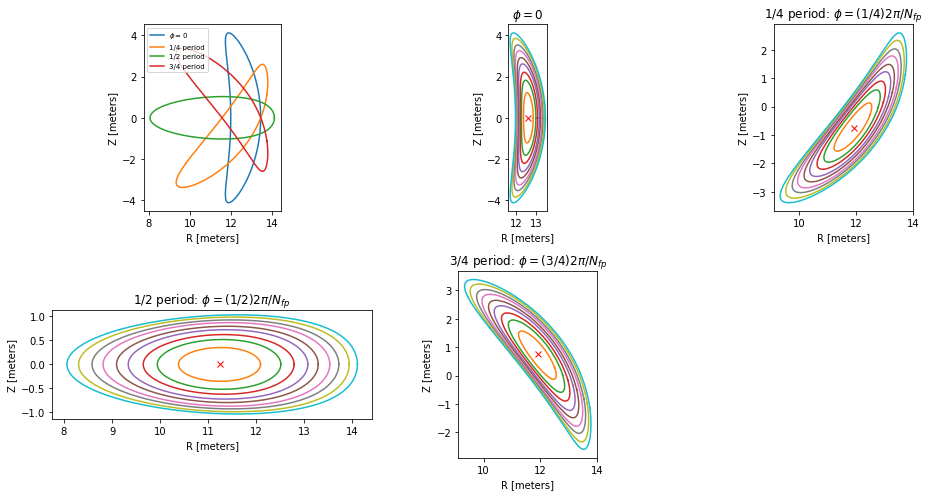

In [11]:
########################################################
# Now make plot of flux surface shapes
########################################################

fig = plt.figure(figsize=myfigsize)

numCols = 3
numRows = 2
plotNum = 1

plt.subplot(numRows,numCols,plotNum)
plotNum += 1
plt.plot(R[:,0], Z[:,0], '-',label=r'$\phi=0$')
plt.plot(R[:,1], Z[:,1], '-',label='1/4 period')
plt.plot(R[:,2], Z[:,2], '-',label='1/2 period')
plt.plot(R[:,3], Z[:,3], '-',label='3/4 period')
plt.gca().set_aspect('equal',adjustable='box')
plt.legend(fontsize='x-small')
plt.xlabel('R [meters]')
plt.ylabel('Z [meters]')

labels=[r'$\phi=0$',r'1/4 period: $\phi=(1/4)2\pi/N_{fp}$',r'1/2 period: $\phi=(1/2)2\pi/N_{fp}$',r'3/4 period: $\phi=(3/4)2\pi/N_{fp}$']

ntheta = 200
nphi = 4
nradius = 10
theta = np.linspace(0,2*np.pi,num=ntheta)
phi = np.linspace(0,2*np.pi/nfp,num=nphi,endpoint=False)
iradii = np.linspace(0,ns-1,num=nradius).round()
iradii = [int(i) for i in iradii]
R = np.zeros((ntheta,nphi,nradius))
Z = np.zeros((ntheta,nphi,nradius))
for itheta in range(ntheta):
    for iphi in range(nphi):
        for iradius in range(nradius):
            for imode in range(nmodes):
                angle = xm[imode]*theta[itheta] - xn[imode]*phi[iphi]
                R[itheta,iphi,iradius] = R[itheta,iphi,iradius] + rmnc[iradii[iradius],imode]*np.cos(angle) \
                                                                  + rmns[iradii[iradius],imode]*np.sin(angle)
                Z[itheta,iphi,iradius] = Z[itheta,iphi,iradius] + zmns[iradii[iradius],imode]*np.sin(angle) \
                                                                  + zmnc[iradii[iradius],imode]*np.cos(angle)

for iphi in range(nphi):
    plt.subplot(numRows,numCols,plotNum)
    plotNum += 1
    for iradius in range(nradius):
        plt.plot(R[:,iphi,iradius], Z[:,iphi,iradius], '-')
    plt.plot(Raxis[iphi],Zaxis[iphi],'xr')
    plt.gca().set_aspect('equal',adjustable='box')
    plt.xlabel('R [meters]')
    plt.ylabel('Z [meters]')
    plt.title(labels[iphi])


plt.tight_layout()



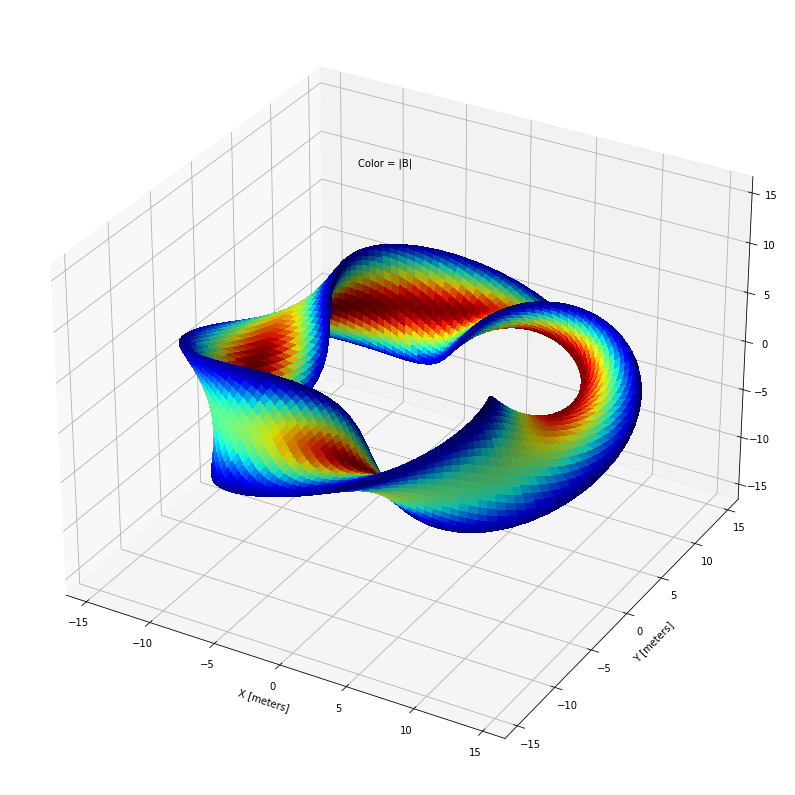

In [29]:
########################################################
# Now make 3D surface plot
########################################################

fig = plt.figure(figsize=myfigsize)

ntheta = 40
nphi = 150
theta1D = np.linspace(0,2*np.pi,num=ntheta)
phi1D = np.linspace(0,2*np.pi,num=nphi)
phi2D, theta2D = np.meshgrid(phi1D,theta1D)
iradius = ns-1
R = np.zeros((ntheta,nphi))
Z = np.zeros((ntheta,nphi))
B = np.zeros((ntheta,nphi))
for imode in range(nmodes):
    angle = xm[imode]*theta2D - xn[imode]*phi2D
    R = R + rmnc[iradius,imode]*np.cos(angle) + rmns[iradius,imode]*np.sin(angle)
    Z = Z + zmns[iradius,imode]*np.sin(angle) + zmnc[iradius,imode]*np.cos(angle)

for imode in range(len(xn_nyq)):
    angle = xm_nyq[imode]*theta2D - xn_nyq[imode]*phi2D
    B = B + bmnc[iradius,imode]*np.cos(angle) + bmns[iradius,imode]*np.sin(angle)

X = R * np.cos(phi2D)
Y = R * np.sin(phi2D)
# Rescale to lie in [0,1]:
B_rescaled = (B - B.min()) / (B.max() - B.min())

# Zoom in:
factor = 1
fig.subplots_adjust(bottom=-factor+0.05,top=1+factor)

#ax = fig.gca(projection='3d')
ax = plt.axes(projection='3d')
#ax.set_aspect('equal')
p = ax.plot_surface(X, Y, Z, facecolors = cm.jet(B_rescaled), rstride=1, cstride=1, antialiased=False) 
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
plt.xlabel('X [meters]')
plt.ylabel('Y [meters]')
#plt.zlabel('Z [meters]')

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.figtext(0.5,0.999,'Color = |B|',horizontalalignment='center',verticalalignment='top',fontsize=10)
##############################################################

plt.show()
